<a href="https://colab.research.google.com/github/Abhijithjj1997/Abhijith-jj/blob/main/Data_science_November_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
x=pd.read_csv("/content/monthly-car-sales.csv")
x

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [ ]:
x.dtypes

Month    object
Sales     int64
dtype: object

In [ ]:
x["Month"]=pd.to_datetime(x["Month"])

In [ ]:
x.dtypes

Month    datetime64[ns]
Sales             int64
dtype: object

In [ ]:
! pip install pystan fbprophet


In [ ]:
x.columns

Index(['Month', 'Sales'], dtype='object')

In [ ]:
import fbprophet
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x.rename(columns={'Month':'ds','Sales':'y'},inplace=True)
x




,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [ ]:

x.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [ ]:
from fbprophet import Prophet

In [ ]:
model=Prophet()

In [ ]:
model.fit(x)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
#For 500 days
future_dates=model.make_future_dataframe(periods=500)

In [ ]:
future_dates.tail()

,ds
603,1970-04-11
604,1970-04-12
605,1970-04-13
606,1970-04-14
607,1970-04-15


In [ ]:
prediction=model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,9608.114823,4515.850467,7711.380940,9608.114823,9608.114823,-3460.363368,-3460.363368,-3460.363368,-3460.363368,-3460.363368,-3460.363368,0.0,0.0,0.0,6147.751455
1,1960-02-01,9712.080426,5273.179860,8272.536720,9712.080426,9712.080426,-2944.120823,-2944.120823,-2944.120823,-2944.120823,-2944.120823,-2944.120823,0.0,0.0,0.0,6767.959603
2,1960-03-01,9809.338570,11031.124137,14415.290562,9809.338570,9809.338570,2940.644880,2940.644880,2940.644880,2940.644880,2940.644880,2940.644880,0.0,0.0,0.0,12749.983451
3,1960-04-01,9913.304173,13178.112496,16368.772679,9913.304173,9913.304173,4913.613942,4913.613942,4913.613942,4913.613942,4913.613942,4913.613942,0.0,0.0,0.0,14826.918115
4,1960-05-01,10013.916048,14627.737247,17703.752611,10013.916048,10013.916048,6166.527646,6166.527646,6166.527646,6166.527646,6166.527646,6166.527646,0.0,0.0,0.0,16180.443694


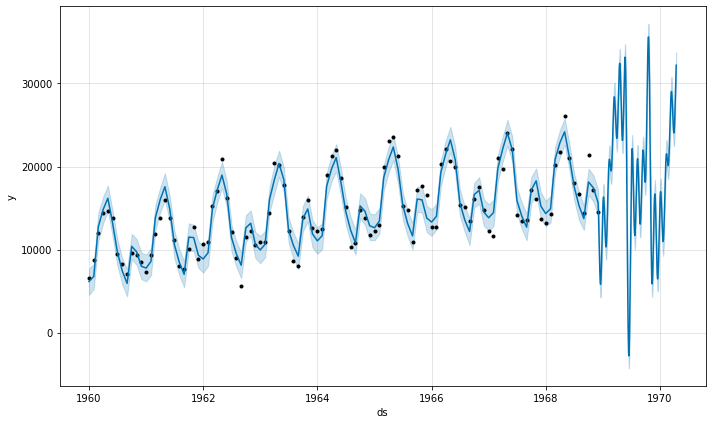

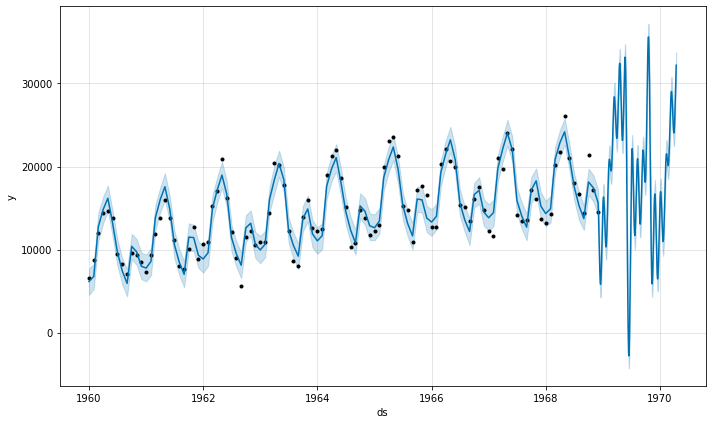

In [ ]:
model.plot(prediction)

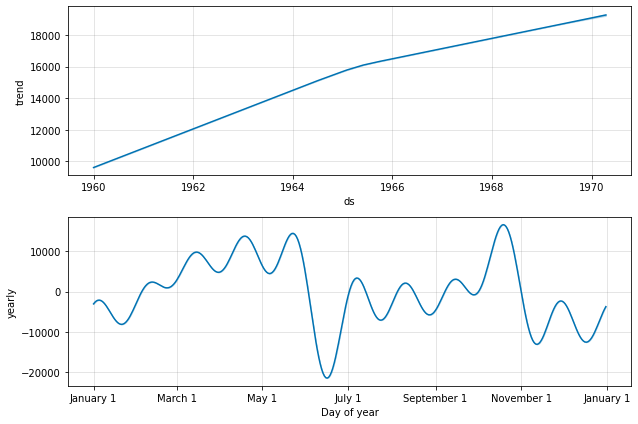

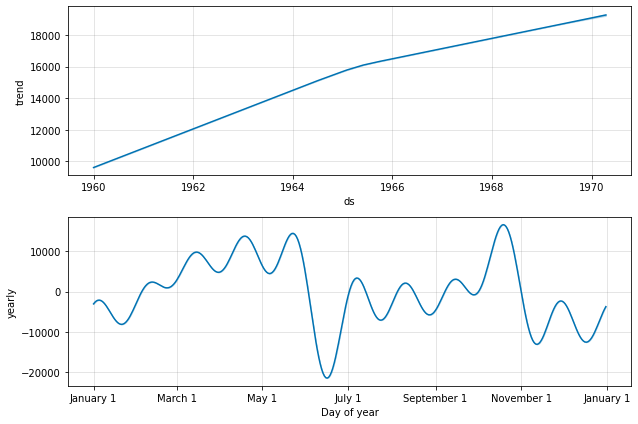

In [ ]:
model.plot_components(prediction)

In [ ]:
from matplotlib.widgets import Slider